# Esercitazione 2

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Per scegliere la distribuzione dei valori delle estrazioni MC per il calcolo dell'integrale, la funzione è stata sviluppata in serie di Taylor al primo ordine in x=1. La distribuzione risultante è $ p(x) = 2(1-x) $. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

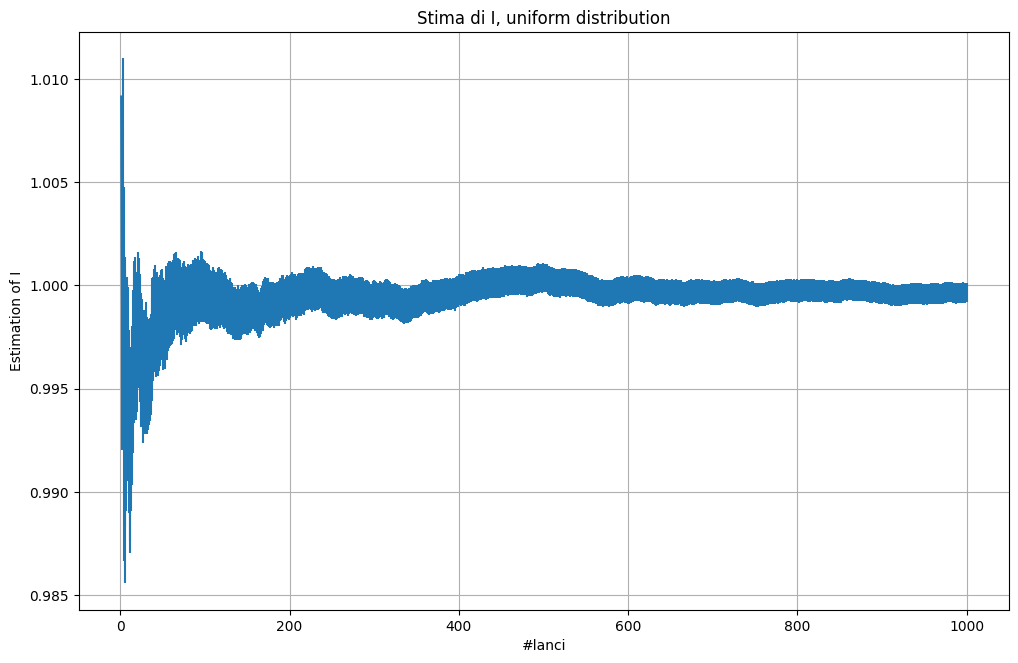

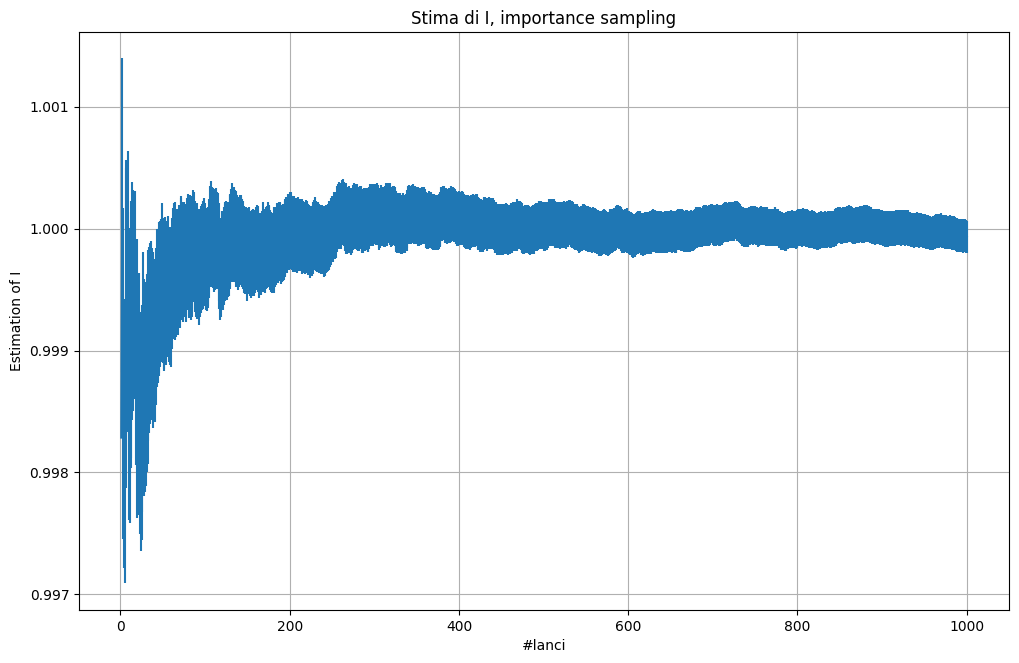

In [2]:
data=np.loadtxt("output_normal.dat")
plt.figure(figsize=(12, 7.5))

plt.errorbar(data[:,0], data[:,2], yerr=data[:,3])
plt.xlabel("#lanci")
plt.ylabel("Estimation of I")
plt.title("Stima di I, uniform distribution")
plt.grid(True)
plt.show()

data2=np.loadtxt("output_distro.dat")
plt.figure(figsize=(12, 7.5))

plt.errorbar(data2[:,0], data2[:,2], yerr=data2[:,3])
plt.xlabel("#lanci")
plt.ylabel("Estimation of I")
plt.title("Stima di I, importance sampling")
plt.grid(True)
plt.show()

## Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

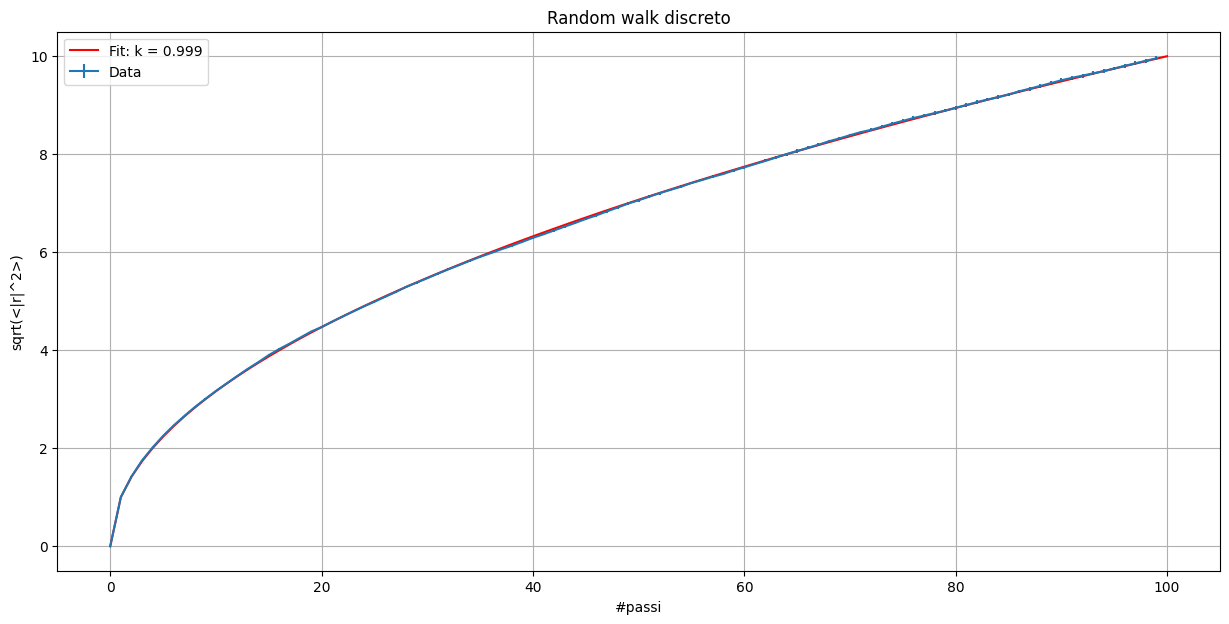

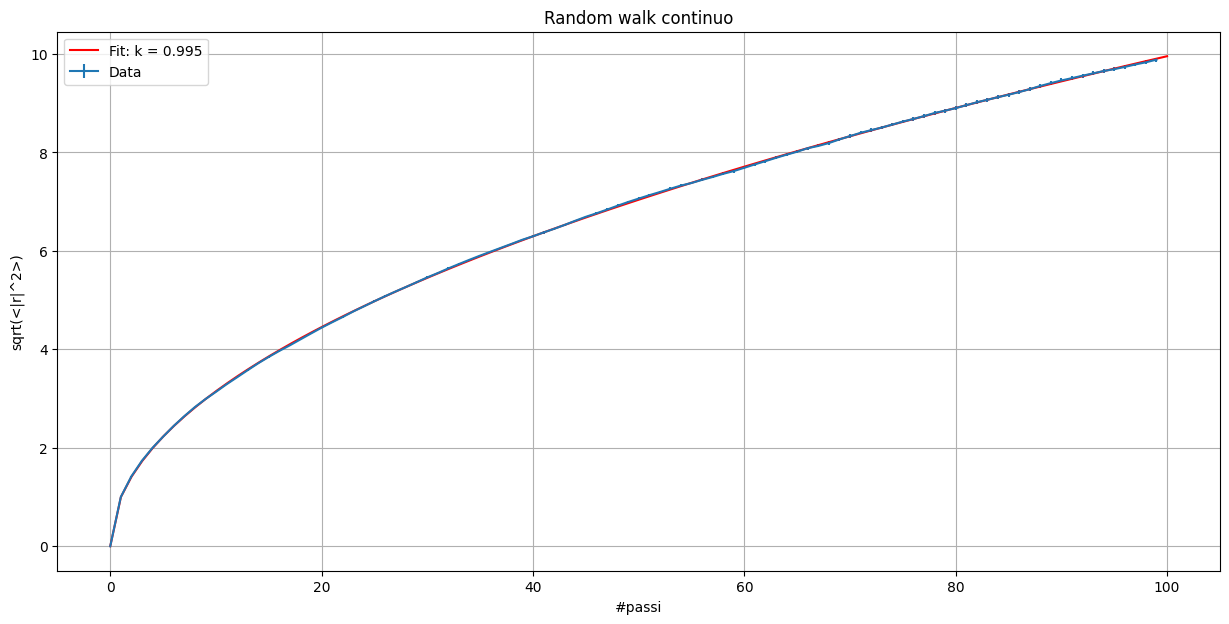

In [3]:
from scipy.optimize import curve_fit

def sqrt_func(x, k):
    return k * np.sqrt(x)

# Fit data with a function of type k*sqrt(x)

data = np.loadtxt("output_discreto.dat")

plt.figure(figsize=(15,7))
x = np.array([i for i in range(100)])
plt.errorbar(x, data[:,2], data[:,3], label="Data")

popt, _ = curve_fit(sqrt_func, x, data[:,2])
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Fit: k = {:.3f}'.format(popt[0]))

plt.title("Random walk discreto")
plt.xlabel("#passi")
plt.ylabel("sqrt(<|r|^2>)")
plt.grid(True)
plt.legend()
plt.show()

data2 = np.loadtxt("output_continuo.dat")

plt.figure(figsize=(15,7))
x = np.array([i for i in range(100)])
plt.errorbar(x, data2[:,2], data2[:,3], label="Data")

popt2, _ = curve_fit(sqrt_func, x, data2[:,2])
x_fit2 = np.linspace(0, 100, 100)
y_fit2 = sqrt_func(x_fit2, *popt2)
plt.plot(x_fit2, y_fit2, 'r-', label='Fit: k = {:.3f}'.format(popt2[0]))

plt.title("Random walk continuo")
plt.xlabel("#passi")
plt.ylabel("sqrt(<|r|^2>)")
plt.grid(True)
plt.legend()
plt.show()